# Exercise 14 

Download the `yelp_academic_dataset_review_Nov2022_small.jsonl` file from Canvas under `Files/datasets`. Use this dataset to finish the following tasks. 

In [4]:
import pandas as pd
import re # regular expressions
import json
import spacy
from tqdm import tqdm
import numpy as np

In [5]:
import os

os.chdir('/Volumes/GoogleDrive/My Drive/2022 Computational Sociology/compsoc')

In [6]:
nlp = spacy.load('en_core_web_sm')
from spacytextblob.spacytextblob import SpacyTextBlob

nlp.add_pipe('spacytextblob')

In [7]:
data = pd.read_json('yelp_academic_dataset_review_Nov2022_small.jsonl', lines = True)
#data


Task 1. For each review included in the dataset, use `spacytextblob` and its inherent document-level scores to get the polarity score of the text. Create a violinplot with the x-axis being individual reviews' star rating, and the y-axis being the calculated polarity scores. Interpret the results. 


In [8]:
ratings = []
review_ids=[]
polarity_scores = []
useful_scores = []
funny_scores =[]
cool_scores =[]

with open('yelp_academic_dataset_review_Nov2022_small.jsonl', 'r') as f:
    line_index = 0
    for line in tqdm(f, total = 10000):
        line_index += 1
        review_dict = json.loads(line)

        review = review_dict['text']
        rating = review_dict['stars']
        review_id = review_dict['review_id']
        useful = review_dict['useful']
        funny = review_dict['funny']
        cool = review_dict['cool']

        review_doc = nlp(review)
        polarity_score = 0
        for assess_tuple in review_doc._.blob.sentiment_assessments.assessments:
            polarity_score += assess_tuple[1]

        ratings.append(rating)
        polarity_scores.append(polarity_score)
        review_ids.append(review_id)
        useful_scores.append(useful)
        funny_scores.append(funny)
        cool_scores.append(cool)

100%|██████████| 10000/10000 [05:26<00:00, 30.64it/s]


In [9]:
yelp_df = pd.DataFrame(columns=['review_id', 'ratings', 'polarity_score', 'useful_scores', 'funny_scores','cool_scores'])
yelp_df['ratings'] = ratings
yelp_df['review_id'] = review_ids
yelp_df['polarity_score'] = polarity_scores
yelp_df['useful_scores'] = useful_scores
yelp_df['funny_scores'] = funny_scores
yelp_df['cool_scores'] = cool_scores

yelp_df

,review_id,ratings,polarity_score,useful_scores,funny_scores,cool_scores
0,KU_O5udG6zpxOg-VcAEodg,3.0,1.023333,0,0,0
1,BiTunyQ73aT9WBnpR9DZGw,5.0,4.425000,1,0,1
2,saUsX_uimxRlCVr67Z4Jig,3.0,1.539286,0,0,0
3,AqPFMleE6RsU23_auESxiA,5.0,2.420455,1,0,1
4,Sx8TMOWLNuJBWer-0pcmoA,4.0,5.613571,1,0,1
...,...,...,...,...,...,...
9995,ZcBtCA9jGhLfakf1jJ2BAg,5.0,1.800000,0,0,0
9996,UIkEO-10J6Y99IhRqUflvg,5.0,0.600000,0,1,0
9997,S-NQM3Axcg8JS3MXHUIvyw,5.0,1.097727,0,0,0
9998,ME79YrEhm2xe4IQy_0zkGw,5.0,2.812500,0,0,0


<AxesSubplot: xlabel='ratings', ylabel='polarity_score'>

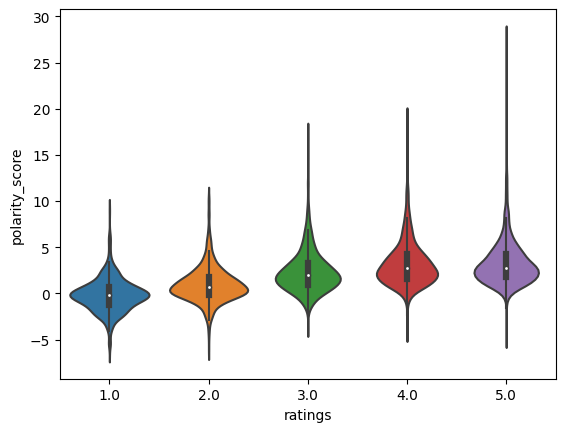

In [10]:
import seaborn as sns

sns.violinplot(data=yelp_df, x='ratings', y='polarity_score')

The polarity(avarage) increases while ratings (number of stars) increase. Also the standard deviation of polarity seems to increase, too. The 5 star reviews have a range of from -10 to 30 while 1 start reviews have a range from -10 to 10. 


Task 2. For each review included in the dataset, extract the subjective phrases in the text using  `spacytextblob` and its `sentiment_assessments.assessments` feature. 

In [11]:
import string

In [12]:
review_ids = []
ratings = []
subjective_scores = []
subjective_phrases = []


with open('yelp_academic_dataset_review_Nov2022_small.jsonl', 'r') as f:
    line_index = 0
    for line in tqdm(f, total = 10000):
        line_index += 1
        review_dict = json.loads(line)

        review = review_dict['text']
        rating = review_dict['stars']
        review_id = review_dict['review_id']

        review_doc = nlp(review)
        subjective_phrases_in_doc = []
        subjective_score = 0
        for assess_tuple in review_doc._.blob.sentiment_assessments.assessments:
            subjective_phrases_in_doc.append(' '.join(assess_tuple[0]))
            subjective_score += assess_tuple[2]

        ratings.append(rating)
        subjective_scores.append(subjective_score)
        review_ids.append(review_id)
        subjective_phrases.append(' '.join(subjective_phrases_in_doc).translate(str.maketrans('', '', string.punctuation)))

100%|██████████| 10000/10000 [05:22<00:00, 31.01it/s]


In [13]:
yelp_sub_df = pd.DataFrame(columns=['review_id', 'ratings', 'subjective_scores', 'subjective_phrases'])
yelp_sub_df['ratings'] = ratings
yelp_sub_df['review_id'] = review_ids
yelp_sub_df['subjective_scores'] = subjective_scores
yelp_sub_df['subjective_phrases'] = subjective_phrases

yelp_sub_df

,review_id,ratings,subjective_scores,subjective_phrases
0,KU_O5udG6zpxOg-VcAEodg,3.0,5.148333,aware multiple other bad good very long very ...
1,BiTunyQ73aT9WBnpR9DZGw,5.0,6.283333,nice clean amazing top fit easy advanced many ...
2,saUsX_uimxRlCVr67Z4Jig,3.0,5.745238,large chicken fresh good mexican long friendly...
3,AqPFMleE6RsU23_auESxiA,5.0,5.704545,wow different delicious favorite different ...
4,Sx8TMOWLNuJBWer-0pcmoA,4.0,6.872857,cute great beautiful very good very really man...
...,...,...,...,...
9995,ZcBtCA9jGhLfakf1jJ2BAg,5.0,1.875000,excellent same great
9996,UIkEO-10J6Y99IhRqUflvg,5.0,0.900000,amazing
9997,S-NQM3Axcg8JS3MXHUIvyw,5.0,6.900758,outstanding great other new new bad extreme...
9998,ME79YrEhm2xe4IQy_0zkGw,5.0,4.800000,nice calm dimly red loved pretty great defini...


Then, for each review whose review_id is in the following `target_review_ids` list, find the top 3 reviews that are most similar to it in terms of their subjective phrases.

Answer the following questions:

For each of the target reviews, what are the top 3 reviews that are most similar to it in terms of their subjective phrases?
What is the rating of each of the target reviews? What about the rating of their top 3 most similar reviews? Are they correlated? Interpret the results. 

Requirement:

Use either spacy's word vector or the one-hot encoding method to get document-level word embeddings for the review text, which should be based only on the subjective phrases. 

Use these word embeddings and the cosine similarity metric to find similar texts

In [14]:
target_review_ids = ["40thYphUgIfvJq17QCfTwA", "E9AB7V4z8xrt2uPF7T55FQ", "4PHFo_GRG4FEk1q4X7xQVQ", "4KpIldEM-tdnrJLqYzRfZQ", 
"PDHRlnEdkEcwATry4w71PQ", "meGaFP7yxQdjyABrYDVeoQ", "pgESDcC7eDx4z_epqon4_Q", "qeSxL-POvGLZD6aQ5O9kvw"]

In [15]:
yelp_sub_df[yelp_sub_df.loc[:,"review_id"].isin(target_review_ids)]

,review_id,ratings,subjective_scores,subjective_phrases
32,40thYphUgIfvJq17QCfTwA,5.0,3.350000,great nice clean huge
39,E9AB7V4z8xrt2uPF7T55FQ,5.0,2.490000,amazing blank great highly busy
66,4KpIldEM-tdnrJLqYzRfZQ,5.0,5.550000,only awesome freshly filled phenomenal sweet ...
73,PDHRlnEdkEcwATry4w71PQ,1.0,3.557143,plain unable back actual back awkwardly next b...
84,meGaFP7yxQdjyABrYDVeoQ,1.0,2.216667,seriously chicken good
96,4PHFo_GRG4FEk1q4X7xQVQ,5.0,8.354545,great completely new other busy total...
347,qeSxL-POvGLZD6aQ5O9kvw,1.0,32.216270,rarely honestly worst objectively horrible nic...
424,pgESDcC7eDx4z_epqon4_Q,1.0,4.696667,half completely top surprised sweet very good ...


In [63]:
yelp_sub_df = yelp_sub_df.dropna(subset= ['subjective_phrases'])

In [16]:
vocab_with_freq = dict()

for i in tqdm(range(len(yelp_sub_df))):
    phrase = yelp_sub_df.loc[i, 'subjective_phrases']
    for token in nlp(phrase):
        if token.is_alpha:
            vocab_with_freq[token.lemma_.lower()] = vocab_with_freq.get(token.lemma_.lower(), 0) + 1

vocabulary_list = list(vocab_with_freq.keys())
print('there are', len(vocabulary_list), 'unique words among subjective phrases')

100%|██████████| 10000/10000 [01:05<00:00, 153.14it/s]

there are 1434 unique words among subjective phrases


In [17]:
one_hot_encodings = []

for i in tqdm(range(len(yelp_sub_df))):
    phrase = yelp_sub_df.loc[i, 'subjective_phrases'] 
    token_indices = []

    for token in nlp(phrase):
        if token.is_alpha:
            token_index_in_vocab = vocabulary_list.index(token.lemma_.lower())
            token_indices.append(token_index_in_vocab)

    one_hot_encoding = np.zeros(len(vocabulary_list))
    for token_index in token_indices:
        one_hot_encoding[token_index] = 1

    one_hot_encodings.append(one_hot_encoding)

100%|██████████| 10000/10000 [01:05<00:00, 152.37it/s]


In [18]:
np.array(one_hot_encodings).shape 


(10000, 1434)

In [19]:
from scipy.spatial.distance import cosine

In [72]:
phrase_a = yelp_sub_df.loc[32, 'subjective_phrases']
similarity_values = []
for i in tqdm(range(1, len(yelp_sub_df))):
    similarity_value = 1 - cosine(one_hot_encodings[32], one_hot_encodings[i])
    similarity_values.append(similarity_value)

similar_df = pd.DataFrame(columns=['phrase', 'similarity_value_with_one_hot'])
similar_df['phrase'] = yelp_sub_df.loc[1:, 'subjective_phrases']
similar_df['similarity_value_with_one_hot'] = similarity_values

similar_df = similar_df.dropna(subset=["phrase"])
print('the primary job title:', phrase_a)
similar_df.sort_values(by='similarity_value_with_one_hot', ascending=False)

  0%|          | 0/9999 [00:00<?, ?it/s]/Users/betulozturan/Library/Python/3.9/lib/python/site-packages/scipy/spatial/distance.py:620: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
100%|██████████| 9999/9999 [00:00<00:00, 44384.19it/s]

the primary job title: great nice clean huge


,phrase,similarity_value_with_one_hot
3680,,1.0
3055,,1.0
359,,1.0
32,great nice clean huge,1.0
1710,,1.0
...,...,...
2657,live absolutely love really good very unique ...,0.0
2658,new possibly most awkward honestly only usuall...,0.0
6205,open ready not only not ready half half double...,0.0
6204,frequent last less not long disappointed love...,0.0


In [ ]:
target_phrases = yelp_sub_df[yelp_sub_df.loc[:,"review_id"].isin(target_review_ids)]
target_phrases

,review_id,ratings,subjective_scores,subjective_phrases
32,40thYphUgIfvJq17QCfTwA,5.0,3.350000,great nice clean huge
39,E9AB7V4z8xrt2uPF7T55FQ,5.0,2.490000,amazing blank great highly busy
66,4KpIldEM-tdnrJLqYzRfZQ,5.0,5.550000,only awesome freshly filled phenomenal sweet ...
73,PDHRlnEdkEcwATry4w71PQ,1.0,3.557143,plain unable back actual back awkwardly next b...
84,meGaFP7yxQdjyABrYDVeoQ,1.0,2.216667,seriously chicken good
96,4PHFo_GRG4FEk1q4X7xQVQ,5.0,8.354545,great completely new other busy total...
347,qeSxL-POvGLZD6aQ5O9kvw,1.0,32.216270,rarely honestly worst objectively horrible nic...
424,pgESDcC7eDx4z_epqon4_Q,1.0,4.696667,half completely top surprised sweet very good ...


In [86]:
# find the location of target ids in the yelp data 
indexes = []
for id in target_review_ids:
    index = int(yelp_sub_df[yelp_sub_df['review_id']==id].index.values)
    indexes.append(index)
print(indexes)

[32, 39, 96, 66, 73, 84, 424, 347]


In [89]:
for a in range(0, len(indexes)):
    
    similarity_values = []
    
    for i in tqdm(range(1, len(yelp_sub_df))):
        phrase_a= yelp_sub_df.loc[indexes[a], 'subjective_phrases']
        similarity_value = 1 - cosine(one_hot_encodings[indexes[a]], one_hot_encodings[i])
        similarity_values.append(similarity_value)

    similar_df = pd.DataFrame(columns=['phrase', 'similarity_value_with_one_hot'])
    similar_df['phrase'] = yelp_sub_df.loc[1:, 'subjective_phrases']
    similar_df['similarity_value_with_one_hot'] = similarity_values

    similar_df = similar_df.dropna(subset=["phrase"])
    print('the primary job title:', phrase_a)
    print(similar_df.sort_values(by='similarity_value_with_one_hot', ascending=False))

  0%|          | 0/9999 [00:00<?, ?it/s]/Users/betulozturan/Library/Python/3.9/lib/python/site-packages/scipy/spatial/distance.py:620: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
100%|██████████| 9999/9999 [00:00<00:00, 32603.62it/s]


the primary job title: great nice clean huge
                                                 phrase  \
3680                                                      
3055                                                      
359                                                       
32                                great nice clean huge   
1710                                                      
...                                                 ...   
2657  live absolutely love  really good very unique ...   
2658  new possibly most awkward honestly only usuall...   
6205  open ready not only not ready half half double...   
6204  frequent  last less not long disappointed love...   
9999  big really happy accomplished super creepy sou...   

      similarity_value_with_one_hot  
3680                            1.0  
3055                            1.0  
359                             1.0  
32                              1.0  
1710                            1.0  
...               

  0%|          | 0/9999 [00:00<?, ?it/s]/Users/betulozturan/Library/Python/3.9/lib/python/site-packages/scipy/spatial/distance.py:620: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
100%|██████████| 9999/9999 [00:00<00:00, 32748.14it/s]


the primary job title: amazing blank great highly busy
                                                 phrase  \
3055                                                      
1710                                                      
359                                                       
967                                                       
5019                                                      
...                                                 ...   
4355  nice little main few down nice high above pers...   
4354                                    cool slow empty   
4352  perfect little good better  good best quickly ...   
4351                love  less sensitive double usually   
9999  big really happy accomplished super creepy sou...   

      similarity_value_with_one_hot  
3055                            1.0  
1710                            1.0  
359                             1.0  
967                             1.0  
5019                            1.0  
...     

  0%|          | 0/9999 [00:00<?, ?it/s]/Users/betulozturan/Library/Python/3.9/lib/python/site-packages/scipy/spatial/distance.py:620: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
100%|██████████| 9999/9999 [00:00<00:00, 32775.45it/s]


the primary job title: great          completely new other busy total much better many other free only major easily future very friendly straightforward overall less          
                                                 phrase  \
4281                                                      
1906                                                      
6236                                                      
3680                                                      
359                                                       
...                                                 ...   
4558                      not actually asian good cheap   
4562  high regular limited top large enough half ita...   
8348  extremely competent fair trouble general complete   
4563  okay general good larger decent particular sma...   
9999  big really happy accomplished super creepy sou...   

      similarity_value_with_one_hot  
4281                            1.0  
1906                            1.0  
6

  0%|          | 0/9999 [00:00<?, ?it/s]/Users/betulozturan/Library/Python/3.9/lib/python/site-packages/scipy/spatial/distance.py:620: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
100%|██████████| 9999/9999 [00:00<00:00, 32414.39it/s]


the primary job title: only awesome  freshly filled phenomenal sweet perfect definitely
                                                 phrase  \
1710                                                      
4281                                                      
4741                                                      
359                                                       
2099                                                      
...                                                 ...   
4137                                     big cute free    
4131                                amazing  great back   
4130  best low impeccable honest professional much l...   
4129  amazing open great favorite   love open    ser...   
9999  big really happy accomplished super creepy sou...   

      similarity_value_with_one_hot  
1710                            1.0  
4281                            1.0  
4741                            1.0  
359                             1.0  
2099         

  0%|          | 0/9999 [00:00<?, ?it/s]/Users/betulozturan/Library/Python/3.9/lib/python/site-packages/scipy/spatial/distance.py:620: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
100%|██████████| 9999/9999 [00:00<00:00, 32017.17it/s]


the primary job title: plain unable back actual back awkwardly next back rudely back nice 
                                                 phrase  \
5830                                                      
4741                                                      
1906                                                      
359                                                       
3055                                                      
...                                                 ...   
5139                good outside several expected other   
5138  old considerably only recently impressed reall...   
5137  spanish much pretty wealthy actually annoying ...   
5135                                 early early  best    
9999  big really happy accomplished super creepy sou...   

      similarity_value_with_one_hot  
5830                            1.0  
4741                            1.0  
1906                            1.0  
359                             1.0  
3055      

  0%|          | 0/9999 [00:00<?, ?it/s]/Users/betulozturan/Library/Python/3.9/lib/python/site-packages/scipy/spatial/distance.py:620: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
100%|██████████| 9999/9999 [00:00<00:00, 32632.54it/s]


the primary job title: seriously chicken good
                                                 phrase  \
3055                                                      
2099                                                      
5955                                                      
5830                                                      
3680                                                      
...                                                 ...   
4260  amazing gorgeous awesome usually outside not d...   
4258                         true delicious  old highly   
4257  new finally new special very glad new very hap...   
4256                         slow worth great fun mixed   
9999  big really happy accomplished super creepy sou...   

      similarity_value_with_one_hot  
3055                            1.0  
2099                            1.0  
5955                            1.0  
5830                            1.0  
3680                            1.0  
...              

  0%|          | 0/9999 [00:00<?, ?it/s]/Users/betulozturan/Library/Python/3.9/lib/python/site-packages/scipy/spatial/distance.py:620: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
100%|██████████| 9999/9999 [00:00<00:00, 32667.82it/s]


the primary job title: half completely top surprised sweet very good bright actually long
                                                 phrase  \
359                                                       
5955                                                      
2099                                                      
4741                                                      
3680                                                      
...                                                 ...   
6861               only few really cheap decent outside   
3037  green amazing    great awesome live many aweso...   
3036      great  friendly great solid reasonable great    
3030       great great simple full huge great cute more   
9999  big really happy accomplished super creepy sou...   

      similarity_value_with_one_hot  
359                             1.0  
5955                            1.0  
2099                            1.0  
4741                            1.0  
3680       

  0%|          | 0/9999 [00:00<?, ?it/s]/Users/betulozturan/Library/Python/3.9/lib/python/site-packages/scipy/spatial/distance.py:620: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
100%|██████████| 9999/9999 [00:00<00:00, 32911.72it/s]

the primary job title: rarely honestly worst objectively horrible nice short bad normal super busy pretty standard french right next next base pretty no much excuse long good  center other more long down back multiple finally pretty pretty mediocre other amazing really good bland mess left 8 nice trendy huge absolutely really love cool popular great hate such negative especially awful undeserved
                                                 phrase  \
967                                                       
1710                                                      
5830                                                      
347   rarely honestly worst objectively horrible nic...   
3680                                                      
...                                                 ...   
6129                           best innovative awesome    
923   very very reasonably quick specific authentic ...   
9458  best  quick reasonably delicious definitely enjoy   
3491       

In [87]:
sum(yelp_sub_df['subjective_phrases'].isna())
# there are no NA values on the data but I have empty lines on the results though dropna does not work for those. 

0